In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.feature_selection import SelectKBest, chi2
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("/content/drive/MyDrive/credit_card_approval1.csv")

# POINT 3: Data Preparation

In [2]:
# Check for missing values
missing_values = data.isna().sum()
print("Missing values:\n",missing_values)

Missing values:
 ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
JOB                    0
BEGIN_MONTHS           0
STATUS                 0
TARGET                 0
dtype: int64


In [3]:
# Handle missing numerical values
imputer = SimpleImputer(strategy="median")
numerical_data = data[["ID", "DAYS_BIRTH", "DAYS_EMPLOYED", "AMT_INCOME_TOTAL"]]
numerical_imputed_data = imputer.fit_transform(numerical_data)
numerical_imputed_df = pd.DataFrame(numerical_imputed_data, columns=["ID","DAYS_BIRTH", "DAYS_EMPLOYED", "AMT_INCOME_TOTAL"])

data[["ID","DAYS_BIRTH", "DAYS_EMPLOYED", "AMT_INCOME_TOTAL"]] = numerical_imputed_df

# Handle missing categorical values
categorical_data = data[["CODE_GENDER", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", "CNT_CHILDREN", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS", "NAME_HOUSING_TYPE", "FLAG_MOBIL", "FLAG_WORK_PHONE", "FLAG_PHONE", "FLAG_EMAIL", "JOB", "BEGIN_MONTHS", "STATUS", "TARGET"]]
categorical_imputer = SimpleImputer(strategy="most_frequent")
categorical_imputed_data = categorical_imputer.fit_transform(categorical_data)
categorical_imputed_df = pd.DataFrame(np.array(categorical_imputed_data), columns=["CODE_GENDER", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", "CNT_CHILDREN", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS", "NAME_HOUSING_TYPE", "FLAG_MOBIL", "FLAG_WORK_PHONE", "FLAG_PHONE", "FLAG_EMAIL", "JOB", "BEGIN_MONTHS", "STATUS", "TARGET"])

data[["CODE_GENDER", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", "CNT_CHILDREN", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS", "NAME_HOUSING_TYPE", "FLAG_MOBIL", "FLAG_WORK_PHONE", "FLAG_PHONE", "FLAG_EMAIL", "JOB", "BEGIN_MONTHS", "STATUS", "TARGET"]] = categorical_imputed_df

In [4]:
# Creating new dataset to be modified
data_cpy = data.copy()

In [5]:
data_cpy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537667 entries, 0 to 537666
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   537667 non-null  float64
 1   CODE_GENDER          537667 non-null  object 
 2   FLAG_OWN_CAR         537667 non-null  object 
 3   FLAG_OWN_REALTY      537667 non-null  object 
 4   CNT_CHILDREN         537667 non-null  object 
 5   AMT_INCOME_TOTAL     537667 non-null  float64
 6   NAME_EDUCATION_TYPE  537667 non-null  object 
 7   NAME_FAMILY_STATUS   537667 non-null  object 
 8   NAME_HOUSING_TYPE    537667 non-null  object 
 9   DAYS_BIRTH           537667 non-null  float64
 10  DAYS_EMPLOYED        537667 non-null  float64
 11  FLAG_MOBIL           537667 non-null  object 
 12  FLAG_WORK_PHONE      537667 non-null  object 
 13  FLAG_PHONE           537667 non-null  object 
 14  FLAG_EMAIL           537667 non-null  object 
 15  JOB              

In [6]:
# Convert the "DAYS_BIRTH" column to positive values
data_cpy["DAYS_BIRTH"] = data_cpy["DAYS_BIRTH"].apply(abs)

In [7]:
# If the values greater than zero, that means that the person does not work
# Convert the "DAYS_EMPLOYED" column to positive values
data_cpy.loc[(data_cpy['DAYS_EMPLOYED'] > 0), 'DAYS_EMPLOYED'] = 0
data_cpy["DAYS_EMPLOYED"] = data_cpy["DAYS_EMPLOYED"].apply(abs)

In [8]:
# Convert the "BEGIN_MONTHS" column to positive values
data_cpy["BEGIN_MONTHS"] = data_cpy["BEGIN_MONTHS"].apply(abs)

In [9]:
# Converting categorical values to 1 and 0
data_cpy = data_cpy.replace({'CODE_GENDER' :{'M' : 1,'F' : 0}})
data_cpy = data_cpy.replace({'FLAG_OWN_CAR' : {'Y' : 1, 'N' : 0}})
data_cpy = data_cpy.replace({'FLAG_OWN_REALTY' : {'Y' : 1, 'N' : 0}})
data_cpy.FLAG_MOBIL = data_cpy.FLAG_MOBIL.astype('int')
data_cpy.FLAG_WORK_PHONE = data_cpy.FLAG_WORK_PHONE.astype('int')
data_cpy.FLAG_EMAIL = data_cpy.FLAG_EMAIL.astype('int')
data_cpy.FLAG_PHONE = data_cpy.FLAG_PHONE.astype('int')
data_cpy.TARGET = data_cpy.TARGET.astype('int')
data_cpy.STATUS.replace('X', 0, inplace=True)
data_cpy.STATUS.replace('C', 0, inplace=True)
data_cpy.STATUS = data_cpy.STATUS.astype('int')

In [10]:
data_cpy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537667 entries, 0 to 537666
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   537667 non-null  float64
 1   CODE_GENDER          537667 non-null  int64  
 2   FLAG_OWN_CAR         537667 non-null  int64  
 3   FLAG_OWN_REALTY      537667 non-null  int64  
 4   CNT_CHILDREN         537667 non-null  object 
 5   AMT_INCOME_TOTAL     537667 non-null  float64
 6   NAME_EDUCATION_TYPE  537667 non-null  object 
 7   NAME_FAMILY_STATUS   537667 non-null  object 
 8   NAME_HOUSING_TYPE    537667 non-null  object 
 9   DAYS_BIRTH           537667 non-null  float64
 10  DAYS_EMPLOYED        537667 non-null  float64
 11  FLAG_MOBIL           537667 non-null  int64  
 12  FLAG_WORK_PHONE      537667 non-null  int64  
 13  FLAG_PHONE           537667 non-null  int64  
 14  FLAG_EMAIL           537667 non-null  int64  
 15  JOB              

#Point 4: Initial Data Analysis

In [11]:
data_cpy.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,JOB,BEGIN_MONTHS,STATUS,TARGET
0,5065438.0,0,1,0,2+ children,270000.0,Secondary / secondary special,Married,With parents,13258.0,2300.0,1,0,0,0,Managers,6,0,0
1,5142753.0,0,0,0,No children,81000.0,Secondary / secondary special,Single / not married,House / apartment,17876.0,377.0,1,1,1,0,Private service staff,4,0,0
2,5111146.0,1,1,1,No children,270000.0,Higher education,Married,House / apartment,19579.0,1028.0,1,0,1,0,Laborers,0,0,0
3,5010310.0,0,1,1,1 children,112500.0,Secondary / secondary special,Married,House / apartment,15109.0,1956.0,1,0,0,0,Core staff,3,0,0
4,5010835.0,1,1,1,2+ children,139500.0,Secondary / secondary special,Married,House / apartment,17281.0,5578.0,1,1,0,0,Drivers,29,0,0


In [12]:
# Descriptive statistics
print('Descriptive statistics:')
data_cpy.describe().T

Descriptive statistics:


,count,mean,std,min,25%,50%,75%,max
ID,537667.0,5.079231e+06,42001.999788,5008806.0,5044925.0,5079091.0,5115755.0,5150487.0
CODE_GENDER,537667.0,3.791101e-01,0.485166,0.0,0.0,0.0,1.0,1.0
FLAG_OWN_CAR,537667.0,4.304895e-01,0.495145,0.0,0.0,0.0,1.0,1.0
FLAG_OWN_REALTY,537667.0,6.425371e-01,0.479253,0.0,0.0,1.0,1.0,1.0
AMT_INCOME_TOTAL,537667.0,1.971171e+05,104138.963465,27000.0,135000.0,180000.0,229500.0,1575000.0
DAYS_BIRTH,537667.0,1.501096e+04,3416.418092,7489.0,12239.0,14785.0,17594.0,24611.0
DAYS_EMPLOYED,537667.0,2.762030e+03,2393.919456,17.0,1050.0,2147.0,3661.0,15713.0
FLAG_MOBIL,537667.0,1.000000e+00,0.000000,1.0,1.0,1.0,1.0,1.0
FLAG_WORK_PHONE,537667.0,2.816148e-01,0.449787,0.0,0.0,0.0,1.0,1.0
FLAG_PHONE,537667.0,2.988932e-01,0.457773,0.0,0.0,0.0,1.0,1.0


##Outlier Detection

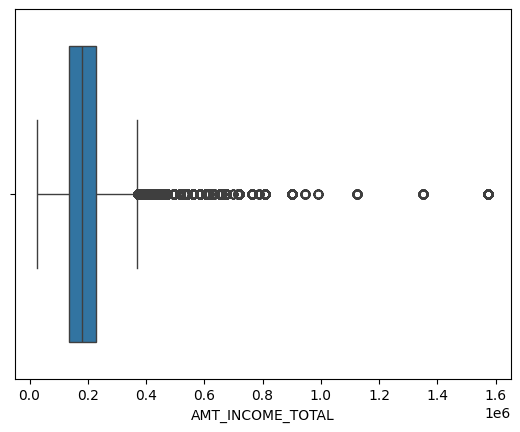

In [13]:
# Outlier anlysis for Income (AMT_INCOME_TOTAL)
outlier_income = data_cpy['AMT_INCOME_TOTAL']
sns.boxplot(x = outlier_income);

In [14]:
Q1 = outlier_income.quantile(0.25)
Q3 = outlier_income.quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
outlier = (outlier_income < lower) | (outlier_income > upper)
outlier

0         False
1         False
2         False
3         False
4         False
          ...  
537662    False
537663    False
537664    False
537665    False
537666     True
Name: AMT_INCOME_TOTAL, Length: 537667, dtype: bool

<ipython-input-15-ae48646e458e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlier_income[outlier] = upper


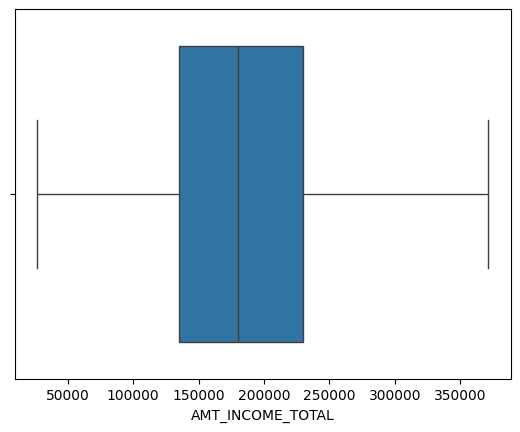

In [15]:
outlier_income[outlier] = upper
sns.boxplot(x = outlier_income);

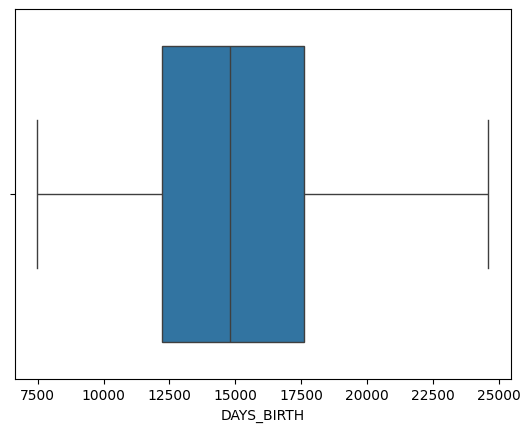

In [16]:
#Outlier analysis for Age (DAYS_BIRTH)
outlier_Age = data_cpy["DAYS_BIRTH"]
sns.boxplot(x = outlier_Age);

<Axes: xlabel='DAYS_EMPLOYED'>

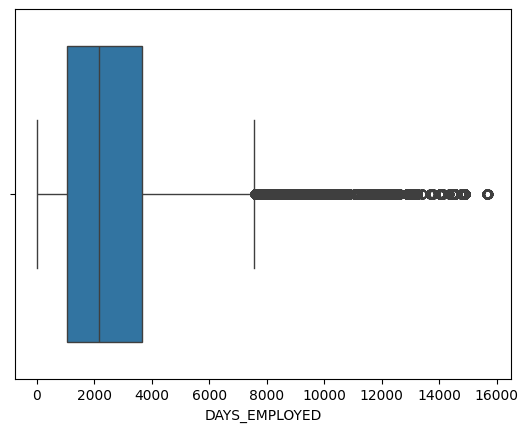

In [17]:
#Outlier analysis for Days beign employed (DAYS_EMPLOYED)
outlier_Days_Employed = data_cpy["DAYS_EMPLOYED"]
sns.boxplot(x = outlier_Days_Employed)

In [18]:
Q1 = outlier_Days_Employed.quantile(0.25)
Q3 = outlier_Days_Employed.quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
outlier = (outlier_Days_Employed < lower) | (outlier_Days_Employed > upper)
outlier

0         False
1         False
2         False
3         False
4         False
          ...  
537662    False
537663    False
537664    False
537665    False
537666    False
Name: DAYS_EMPLOYED, Length: 537667, dtype: bool

<ipython-input-19-f4d5a0cfe51d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlier_Days_Employed[outlier] = upper


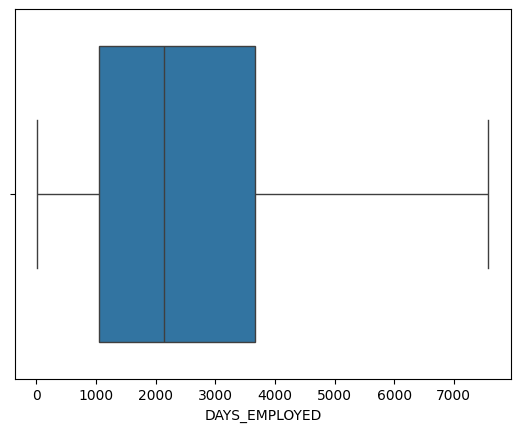

In [19]:
outlier_Days_Employed[outlier] = upper
sns.boxplot(x = outlier_Days_Employed);

<Axes: xlabel='BEGIN_MONTHS'>

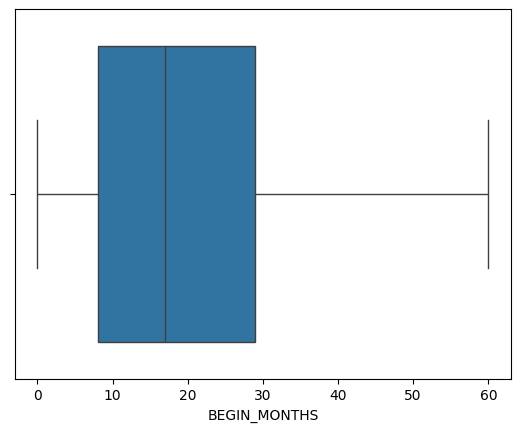

In [20]:
#Outlier analysis for begin months
outlier_Begin_Months = data_cpy["BEGIN_MONTHS"]
sns.boxplot(x = outlier_Begin_Months)

##Data visualization

<Figure size 1000x1000 with 0 Axes>

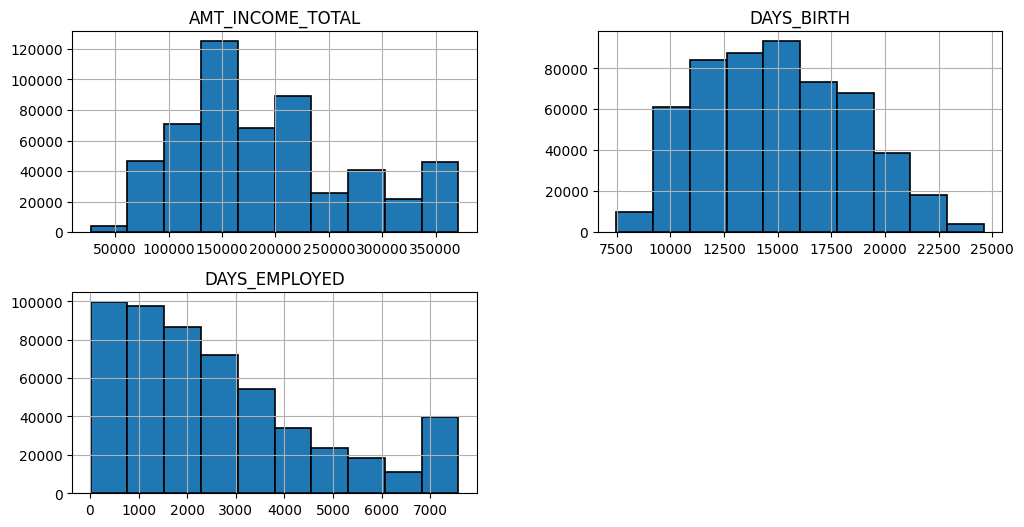

In [21]:
plt.figure(figsize=(10,10))

columns_to_plot = ["AMT_INCOME_TOTAL","DAYS_BIRTH","DAYS_EMPLOYED"]
data_cpy[columns_to_plot].hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)

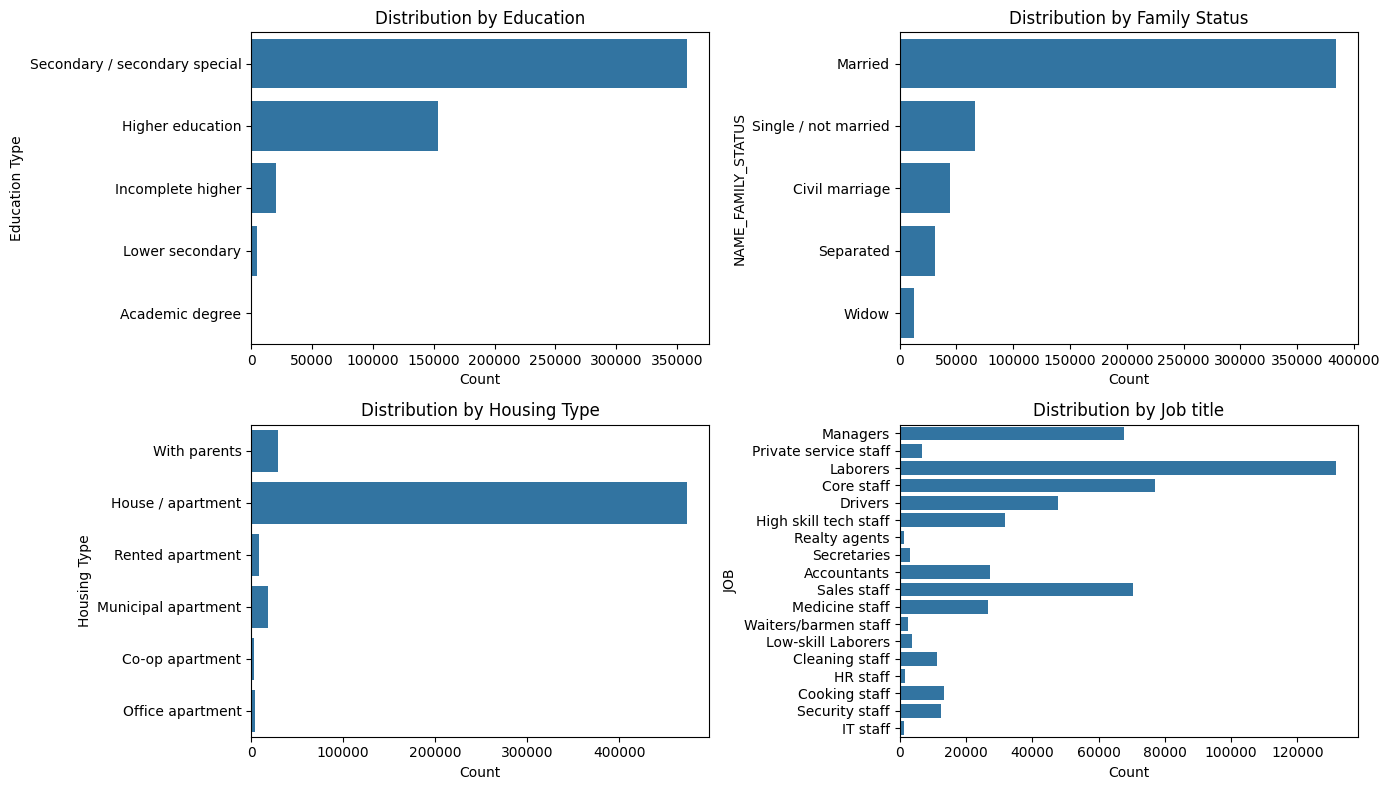

In [22]:
# Distribution plots
fig, axes = plt.subplots(2,2)

g1= sns.countplot(y=data_cpy.NAME_EDUCATION_TYPE, ax=axes[0,0])
g1.set_title("Distribution by Education")
g1.set_xlabel("Count")
g1.set_ylabel("Education Type")

g2=sns.countplot(y=data_cpy.NAME_FAMILY_STATUS,linewidth=1.2, ax=axes[0,1])
g2.set_title("Distribution by Family Status")
g2.set_xlabel("Count")

g3= sns.countplot(y=data_cpy.NAME_HOUSING_TYPE,linewidth=1.2, ax=axes[1,0])
g3.set_title("Distribution by Housing Type")
g3.set_xlabel("Count")
g3.set_ylabel("Housing Type")

g4=sns.countplot(y=data_cpy.JOB,linewidth=1.2, ax=axes[1,1])
g4.set_title("Distribution by Job title")
g4.set_xlabel("Count")

fig.set_size_inches(14,8)

plt.tight_layout()

plt.show()

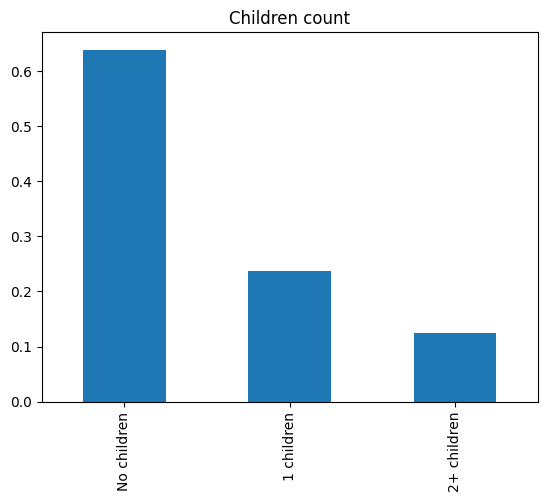

In [23]:
# Other distribution plots
data_cpy['CNT_CHILDREN'].value_counts(normalize=True).plot.bar(title='Children count')
plt.show()

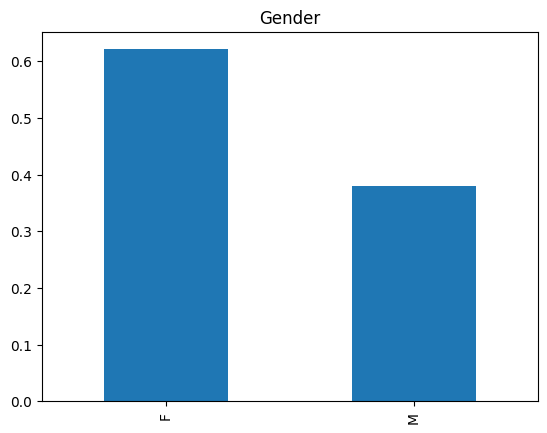

In [24]:
data['CODE_GENDER'].value_counts(normalize=True).plot.bar(title='Gender')
plt.show()

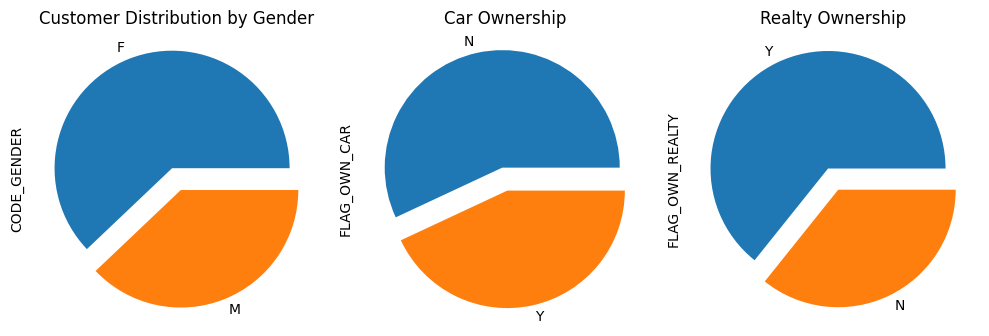

In [25]:
fig, axes = plt.subplots(1,3)

g1= data['CODE_GENDER'].value_counts().plot.pie(explode=[0.1,0.1], ax=axes[0])
g1.set_title("Customer Distribution by Gender")

g2= data['FLAG_OWN_CAR'].value_counts().plot.pie(explode=[0.1,0.1], ax=axes[1])
g2.set_title("Car Ownership")

g3= data['FLAG_OWN_REALTY'].value_counts().plot.pie(explode=[0.1,0.1], ax=axes[2])
g3.set_title("Realty Ownership")

fig.set_size_inches(10,5)

plt.tight_layout()

plt.show()

#Point 5: Division of the set of objects into two groups

In [26]:
#OneHot Encoding
aux1 = pd.get_dummies(data_cpy, columns = ["CNT_CHILDREN"])
aux2 = pd.get_dummies(aux1, columns = ["NAME_EDUCATION_TYPE"])
aux3 = pd.get_dummies(aux2, columns = ["NAME_FAMILY_STATUS"])
aux4 = pd.get_dummies(aux3, columns = ["NAME_HOUSING_TYPE"])
new_data = pd.get_dummies(aux4, columns = ["JOB"])
new_data

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,...,JOB_Laborers,JOB_Low-skill Laborers,JOB_Managers,JOB_Medicine staff,JOB_Private service staff,JOB_Realty agents,JOB_Sales staff,JOB_Secretaries,JOB_Security staff,JOB_Waiters/barmen staff
0,5065438.0,0,1,0,270000.0,13258.0,2300.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,5142753.0,0,0,0,81000.0,17876.0,377.0,1,1,1,...,0,0,0,0,1,0,0,0,0,0
2,5111146.0,1,1,1,270000.0,19579.0,1028.0,1,0,1,...,1,0,0,0,0,0,0,0,0,0
3,5010310.0,0,1,1,112500.0,15109.0,1956.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5010835.0,1,1,1,139500.0,17281.0,5578.0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537662,5142999.0,1,1,0,166500.0,12372.0,5401.0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
537663,5010773.0,0,0,1,135000.0,14160.0,4635.0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
537664,5105601.0,1,0,1,180000.0,24204.0,2462.0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
537665,5132833.0,1,1,0,220500.0,22647.0,3847.0,1,0,1,...,1,0,0,0,0,0,0,0,0,0


##Splitting the dataset into training and testinig sets

In [27]:
from sklearn.model_selection import train_test_split, cross_val_score,cross_val_predict
X = new_data.drop("TARGET", axis = 1)
y = new_data["TARGET"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
#print(new_data.dtypes)

In [28]:
# ANN
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit_transform(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
import time
from sklearn.metrics import accuracy_score

start_time =time.time()

training_start = time.perf_counter()
mlpc = MLPClassifier().fit(X_train_scaled, y_train)
training_end = time.perf_counter()

prediction_start = time.perf_counter()
preds_mlpc = mlpc.predict(X_test_scaled)
prediction_end = time.perf_counter()

acc_mlpc = 100*accuracy_score(y_test, preds_mlpc)

mlpc_train_time = training_end-training_start
mlpc_prediction_time = prediction_end-prediction_start

print("ANN Accuracy: ", acc_mlpc)
print("Time consumed for training: %s seconds" % (mlpc_train_time))
print("Prediction Execution Time: %s seconds" % (mlpc_prediction_time))

ANN Accuracy:  100.0
Time consumed for training: 63.36600750200003 seconds
Prediction Execution Time: 0.2667386210000018 seconds


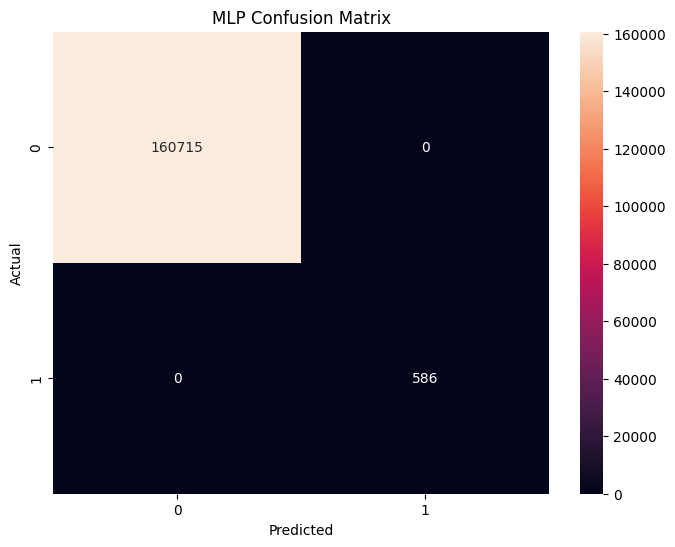

In [30]:
# Confusion matrix
cm = confusion_matrix(y_test, preds_mlpc)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('MLP Confusion Matrix')
plt.show()

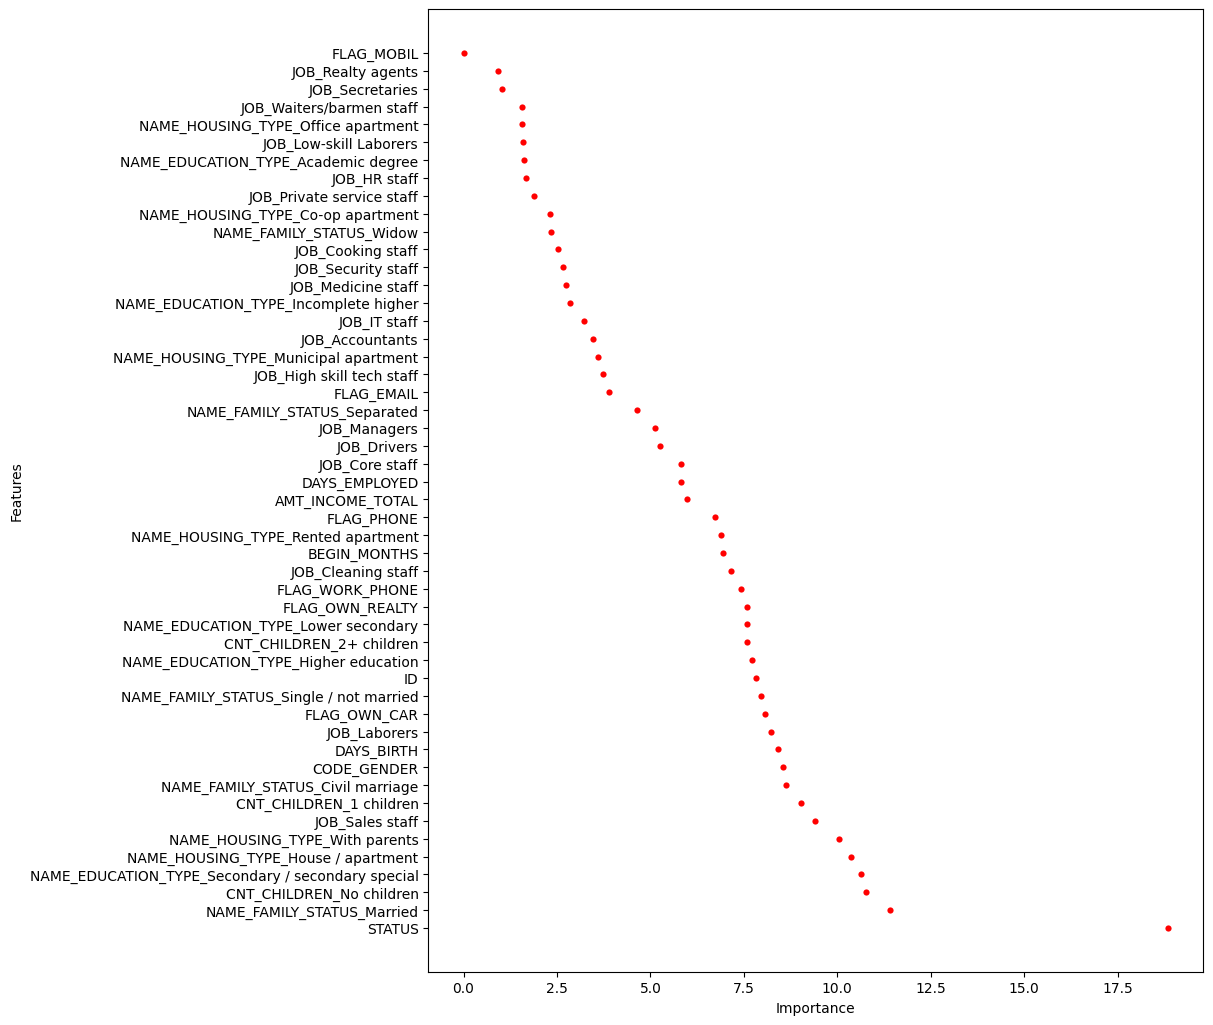

In [31]:
# Get the coefficients (weights) for the input layer
weights = mlpc.coefs_[0]

# Calculate the absolute sum of weights for each feature
feature_importances = np.sum(np.abs(weights), axis=1)

# Create a DataFrame to visualize feature importances
imp = pd.DataFrame({'Name': X_train.columns, 'Score': feature_importances})
imp.sort_values(by='Score', inplace=True)

# Plot feature importances
sns.scatterplot(x='Score', y='Name', linewidth=0, data=imp, s=20, color='red').set(
    xlabel='Importance',
    ylabel='Features'
)

plt.gcf().set_size_inches(10, 12.5)
plt.show()